# Machines Manufacturing Captal Budgeting Model (Project 1)

Insert your description of the model here and add any additional sections below:
- [**Setup**](#Setup): Runs any imports and other setup
- [**Inputs**](#Inputs): Defines the inputs for the model

## Setup

Setup for the later calculations are here. The necessary packages are imported.

In [1]:
from dataclasses import dataclass
import numpy_financial as npf

## Inputs

All of the inputs for the model are defined here. A class is constructed to manage the data, and an instance of the class containing the default inputs is created.

In [2]:
@dataclass
class ModelInputs:
    n_phones: float = 100000
    price_scrap: float = 50000
    price_phone: float = 2000
    cost_machine_adv: float = 1000000
    cogs_phone: float = 250
    n_life: int = 10
    n_machines: int = 5
    d_1: float = 100000
    g_d: float = 0.2
    max_year: float = 20
    interest: float = 0.05
        
    # Inputs for bonus problem
    elasticity: float = 100
    demand_constant: float = 300000
        
model_data = ModelInputs()
model_data

ModelInputs(n_phones=100000, price_scrap=50000, price_phone=2000, cost_machine_adv=1000000, cogs_phone=250, n_life=10, n_machines=5, d_1=100000, g_d=0.2, max_year=20, interest=0.05, elasticity=100, demand_constant=300000)

## Oulines
cashflows = revenues - costs

1. Revenues
    - sales of phones 
        - number of goods sold * phones price
    - sales of depreciated machines
2. Costs
    - purchases of machines
    - costs of manuefacturing the phones
    - costs of advertisement

Notes:
1. no need to replace the machines (no machines purchases after year 5?)
2. number of goods sold is the lower one between demand and production
3. launching the ads after machines purchases are done (ads costs are induced every year after year 5?)
4. demand grows by g_d = 20% if there is advertisement

Logic:
for every year:
1. identify if there are ads costs. if there are, demand increase
2. whether there are scraped machines
3. how many phones have been sold

In [3]:
# determine the number of operating machines and scraped machines for each year
def op_sp_machines(year):
    '''
    return two lists one contains the number of machines in operation,
    the other contains the scraped machines.
    '''
    
    op = []
    sp = []
    
    if year <= model_data.n_machines:    # purchase one machine per year before year 5
        op = list(range(year))
    elif model_data.n_life >= year > model_data.n_machines:    # always have 5 operating machines between year 5 and 10
        op = list(range(model_data.n_machines))
    elif model_data.n_machines+model_data.n_life >= year > model_data.n_life:   # one depreciated machine per year between year 11 and 15
        sp = list(range(year-model_data.n_life))
        op = list(range(model_data.n_machines-len(sp)))
    else:    # no operating and scraped machines after year 15
        op = []
    
    return op, sp

In [4]:
# determine if there is advertisement
def is_ads(year):
    '''
    return a Bool value indicating whether advertisement exist
    '''
    
    ads = False
    
    if year > model_data.n_machines:    # having ads every year after year 5
        ads = True
    
    return ads

In [5]:
# determine the number of goods sold each year
def n_goods_sold(production, demand):
    '''
    return the lower value between each year's production and demand
    '''
    return production if production<=demand else demand

In [6]:
# calculate the total revenues each year
def total_revenues(n_goods_sold, sp_machines):
    '''
    return the total revenues, which consists of sales from goods and from scraped machines
    '''
    
    sales_from_goods = n_goods_sold * model_data.price_phone
    
    if sp_machines > 0:
        sales_from_machines = model_data.cost_machine_adv
    else:
        sales_from_machines = 0
    
    return sales_from_goods+sales_from_machines

In [7]:
# calculate the total costs per year
def total_costs(n_goods_sold, op_machines, sp_machines, ads_costs):
    '''
    return the total costs per year.
    which consists of ads costs, purchases of machines and phones manufacturing
    '''
    
    if op_machines>0 and sp_machines==0:    # only need to purchase machines when there are less than 5 operating machines and no scraped machines
        machines_costs = model_data.cost_machine_adv
    else:
        machines_costs = 0
    
    phones_costs = n_goods_sold * model_data.cogs_phone
    
    return machines_costs+phones_costs+ads_costs

In [8]:
# calculate each year's cashflow
def cashflow():
    '''
    return a list that contains each year's cashflows throughout the project years
    '''
    cashflows = []
    demand = model_data.d_1
    
    for year in range(1, model_data.max_year+1):
        op_machines = len(op_sp_machines(year)[0])
        sp_machines = len(op_sp_machines(year)[1])
        
        if is_ads(year) == True:
            cost_ads = model_data.cost_machine_adv
            demand *= (1+model_data.g_d)
        else:
            cost_ads = 0
        
        production = op_machines * model_data.n_phones
        goods_sold = n_goods_sold(production, demand)
        revenues = total_revenues(goods_sold, sp_machines)
        
        costs = total_costs(goods_sold, op_machines, sp_machines, cost_ads)
        
        cash_flow = revenues - costs
        cashflows.append(cash_flow)
    
    return cashflows

In [9]:
cash_flows = cashflow() # this should ultimately be set to the list containing your cash flow numbers in each year
npv = npf.npv(model_data.interest, cash_flows) # this should ultimately be set to the overally model npv number 

In [10]:
cash_flows

[174000000,
 174000000,
 174000000,
 174000000,
 174000000,
 208000000.0,
 250000000.0,
 300400000.0,
 360880000.0,
 433456000.0,
 522547199.9999999,
 525000000,
 350000000,
 175000000,
 0,
 -1000000,
 -1000000,
 -1000000,
 -1000000,
 -1000000]

In [11]:
npv

2790946673.693438

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

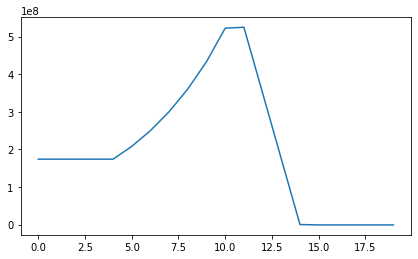

In [18]:
plt.figure(figsize=(7, 4))
plt.plot(cash_flows)
plt.show()